In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d pranjallk1995/covid-xrays

 99% 335M/338M [00:11<00:00, 33.7MB/s]
100% 338M/338M [00:11<00:00, 31.4MB/s]


In [ ]:
!unzip /content/covid-xrays.zip

Archive:  /content/covid-xrays.zip
  inflating: X-rays/test/Covid-19/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1a.png_copy.png  
  inflating: X-rays/test/Covid-19/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg  
  inflating: X-rays/test/Covid-19/2966893D-5DDF-4B68-9E2B-4979D5956C8E.jpeg  
  inflating: X-rays/test/Covid-19/5A78BCA9-5B7A-440D-8A4E-AE7710EA6EAD.jpeg  
  inflating: X-rays/test/Covid-19/6b44464d-73a7-4cf3-bbb6-ffe7168300e3.annot.original.jpeg_copy.jpg  
  inflating: X-rays/test/Covid-19/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg  
  inflating: X-rays/test/Covid-19/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg_copy.jpg  
  inflating: X-rays/test/Covid-19/7EF28E12-F628-4BEC-A8C5-E6277C2E4F60.png  
  inflating: X-rays/test/Covid-19/80446565-E090-4187-A031-9D3CEAA586C8.jpeg  
  inflating: X-rays/test/Covid-19/CD50BA96-6982-4C80-AE7B-5F67ACDBFA56.jpeg  
  inflating: X-rays/test/Covid-19/D7AF463C-2369-492D-908D-BE1911CCD74C.jpeg_copy.jpg  
  inflating: X-rays/test/Covid-19/F434

In [ ]:
#import the datagenerator library
from keras.preprocessing.image import ImageDataGenerator


### Image Data Augmentation


In [ ]:
#image data augmentation to the data.
datagen = ImageDataGenerator(rescale=1./ 255)

##Loading our data and performing data Augmentation

In [ ]:
train_transform = datagen.flow_from_directory('/content/X-rays/train',class_mode='categorical')
val_transform = datagen.flow_from_directory('/content/X-rays/val',class_mode='categorical')
test_transform = datagen.flow_from_directory('/content/X-rays/test',class_mode='categorical')

Found 760 images belonging to 3 classes.
Found 95 images belonging to 3 classes.
Found 95 images belonging to 3 classes.


In [ ]:
# confirming that the iterators work
batchX, batchy = train_transform.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(32, 256, 256, 3), min=0.000, max=1.000


##Import the Necessary Libraries

In [ ]:
# importing necessary libraries

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout
from keras.optimizers import SGD

In [ ]:
#Initialzing model
model = Sequential()
model.add(InputLayer(input_shape=(256, 256, 3)))

In [ ]:
# 1st conv block

model.add(Conv2D(8, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 2nd conv block

model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 3rd conv block

model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(BatchNormalization())

# 4th conv block

model.add(Conv2D(16, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(BatchNormalization())

# 5th conv block

model.add(Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 6th conv block

model.add(Conv2D(64, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(BatchNormalization())

# 7th conv block

model.add(Conv2D(32, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(BatchNormalization())

# 8th conv block

model.add(Conv2D(64, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())

# 9th conv block

model.add(Conv2D(128, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(BatchNormalization())

# 10th conv bock

model.add(Conv2D(64, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))

# output layer

model.add(Dense(units=3, activation='softmax'))

#Summary of Model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 8)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 128, 128, 8)       32        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                        

In [ ]:
#compiling the model
opt = SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

##Fit the model

In [ ]:
# fit on data for 20 epochs
history = model.fit_generator(train_transform, epochs=20, validation_data=val_transform)

<ipython-input-28-e50fc9fd651b>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_transform, epochs=20, validation_data=val_transform)


Epoch 1/20
24/24 [==============================] - 17s 605ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.5698 - val_accuracy: 0.8316
Epoch 2/20
24/24 [==============================] - 15s 650ms/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.5401 - val_accuracy: 0.8316
Epoch 3/20
24/24 [==============================] - 15s 627ms/step - loss: 0.0154 - accuracy: 0.9974 - val_loss: 0.5685 - val_accuracy: 0.7895
Epoch 4/20
24/24 [==============================] - 14s 602ms/step - loss: 0.0067 - accuracy: 0.9987 - val_loss: 0.4801 - val_accuracy: 0.8211
Epoch 5/20
24/24 [==============================] - 15s 611ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.4454 - val_accuracy: 0.8316
Epoch 6/20
24/24 [==============================] - 14s 602ms/step - loss: 0.0065 - accuracy: 0.9987 - val_loss: 0.4822 - val_accuracy: 0.8211
Epoch 7/20
24/24 [==============================] - 15s 614ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.4683 - val_accuracy: 0.8421

##Save the model

In [ ]:
#save the model
model.save('covid.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#import numpy library
import numpy as np

#import load_model method to load our saved model
from keras.models import load_model

#import image from keras.preprocessing
from keras.preprocessing import image

#loading our saved model file
model= load_model("covid.h5")

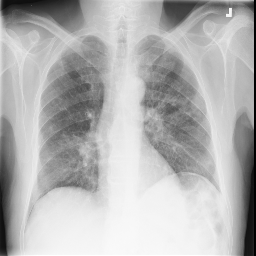

In [ ]:
img = image.load_img('/content/X-rays/test/Pneumonia/00008715_000.png',target_size=(256,256))

#converting in to array format
x=image.img_to_array(img)

#changing its dimensions as per our requirement
x=np.expand_dims(x,axis=0)

#printing the image
img

In [ ]:
pred =np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 461ms/step


In [ ]:
index=['0','1','2']
result=str(index[pred[0]])
result

'1'

In [ ]:
train_transform.class_indices

{'Covid-19': 0, 'No_findings': 1, 'Pneumonia': 2}

In [ ]:
index1=['Covid-19','No_findings','Pneumonia']
result1=str(index1[pred[0]])
result1

'No_findings'